# 1. Test of particle pusher (steps 4 and 5)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import bsplines          as bsp
import Bspline           as bspline

import hylife_PIC

In [2]:
#====================================================================================
#  calling epyccel for particle pusher
#====================================================================================
from pyccel.epyccel import epyccel
pic = epyccel(hylife_PIC)

print('pyccelization of pic functions done!')
#====================================================================================

pyccelization of pic functions done!


In [59]:
Nel = [5, 6, 7]            # mesh generation on logical domain
bc  = [True, True, True]   # boundary conditions
p   = [2, 2, 3]            # splines degrees

L   = [2., 3., 1.]         # box lengthes of physical domain

el_b     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]                           # breakpoints
T        = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)]       # knot vectors
t        = [T[1:-1] for T in T]                                                    # reduced knot vectors
Nbase0   = [Nel + p - bc*p for Nel, p, bc in zip(Nel, p, bc)]                      # number of basis functions in V0

Np = int(10)

particles = np.empty((Np, 7), dtype=float, order='F')

particles[:, :] = np.random.rand(Np, 7)

particles[0, 0] = 0.5/L[0]
particles[0, 1] = 0.25/L[1]
particles[0, 2] = 0./L[2]
particles[0, 3] = -0.2
particles[0, 4] = 0.
particles[0, 5] = 0.

particles[1, 0] = 0.5/L[0]
particles[1, 1] = 0.25/L[1]
particles[1, 2] = 0./L[2]
particles[1, 3] = -0.1
particles[1, 4] = 0.
particles[1, 5] = 0.

spans0    = np.empty((Np, 3), dtype=int, order='F')
spans0[:, 0] = np.floor(particles[:, 0]*Nel[0]).astype(int) + p[0]
spans0[:, 1] = np.floor(particles[:, 1]*Nel[1]).astype(int) + p[1]
spans0[:, 2] = np.floor(particles[:, 2]*Nel[2]).astype(int) + p[2]


b1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

#b1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
#b2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
#b3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

DF     = np.array([[  L[0], 0., 0.], [0.,   L[1], 0.], [0., 0.,   L[2]]])
DFinv  = np.array([[1/L[0], 0., 0.], [0., 1/L[1], 0.], [0., 0., 1/L[2]]])
g_sqrt = L[0]*L[1]*L[2]

Beq    = g_sqrt*DFinv.dot(np.array([0., 0., 1.]))
#Beq    =  np.array([0., 0., 1.])

#=================== coefficients for pp-forms (1 - component) ======================
if p[0] == 3:
    d1 = 1/Nel[0]
    pp0_1 = np.asfortranarray([[1/6, -1/(2*d1), 1/(2*d1**2), -1/(6*d1**3)], [2/3, 0., -1/d1**2, 1/(2*d1**3)], [1/6, 1/(2*d1), 1/(2*d1**2), -1/(2*d1**3)], [0., 0., 0., 1/(6*d1**3)]])
    pp1_1 = np.asfortranarray([[1/2, -1/d1, 1/(2*d1**2)], [1/2, 1/d1, -1/d1**2], [0., 0., 1/(2*d1**2)]])
elif p[0] == 2:
    d1 = 1/Nel[0]
    pp0_1 = np.asfortranarray([[1/2, -1/d1, 1/(2*d1**2)], [1/2, 1/d1, -1/d1**2], [0., 0., 1/(2*d1**2)]])
    pp1_1 = np.asfortranarray([[1., -1/d1], [0., 1/d1]])
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================



#=================== coefficients for pp-forms (2 - component) ======================
if p[1] == 3:
    d2 = 1/Nel[1]
    pp0_2 = np.asfortranarray([[1/6, -1/(2*d2), 1/(2*d2**2), -1/(6*d2**3)], [2/3, 0., -1/d2**2, 1/(2*d2**3)], [1/6, 1/(2*d2), 1/(2*d2**2), -1/(2*d2**3)], [0., 0., 0., 1/(6*d2**3)]])
    pp1_2 = np.asfortranarray([[1/2, -1/d2, 1/(2*d2**2)], [1/2, 1/d2, -1/d2**2], [0., 0., 1/(2*d2**2)]])
elif p[1] == 2:
    d2 = 1/Nel[1]
    pp0_2 = np.asfortranarray([[1/2, -1/d2, 1/(2*d2**2)], [1/2, 1/d2, -1/d2**2], [0., 0., 1/(2*d2**2)]])
    pp1_2 = np.asfortranarray([[1., -1/d2], [0., 1/d2]])
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================



#=================== coefficients for pp-forms (3 - component) ======================
if p[2] == 3:
    d3 = 1/Nel[2]
    pp0_3 = np.asfortranarray([[1/6, -1/(2*d3), 1/(2*d3**2), -1/(6*d3**3)], [2/3, 0., -1/d3**2, 1/(2*d3**3)], [1/6, 1/(2*d3), 1/(2*d3**2), -1/(2*d3**3)], [0., 0., 0., 1/(6*d3**3)]])
    pp1_3 = np.asfortranarray([[1/2, -1/d3, 1/(2*d3**2)], [1/2, 1/d3, -1/d3**2], [0., 0., 1/(2*d3**2)]])
elif p[2] == 2:
    d3 = 1/Nel[2]
    pp0_3 = np.asfortranarray([[1/2, -1/d3, 1/(2*d3**2)], [1/2, 1/d3, -1/d3**2], [0., 0., 1/(2*d3**2)]])
    pp1_3 = np.asfortranarray([[1., -1/d3], [0., 1/d3]])
else:
    print('Only cubic and quadratic splines implemented!')
#====================================================================================


# test spaces
spline_space0_1 = bspline.Bspline(T[0], p[0])
spline_space0_2 = bspline.Bspline(T[1], p[1])
spline_space0_3 = bspline.Bspline(T[2], p[2])

spline_space1_1 = bspline.Bspline(t[0], p[0] - 1)
spline_space1_2 = bspline.Bspline(t[1], p[1] - 1)
spline_space1_3 = bspline.Bspline(t[2], p[2] - 1)

In [57]:
Beq

array([0., 0., 6.])

In [58]:
B        = np.zeros(3, dtype=float)

v_test   = np.zeros((Np, 3), dtype=float)
q_test   = np.zeros((Np, 3), dtype=float)

dt       = 0.15
I        = np.identity(3, dtype=float)
vec_prod = np.zeros((3, 3), dtype=float)

for ip in range(Np):
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    # evaluation of 1- component
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of 2- component
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of 3- component
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
    vec_prod[0, 1] = -B[2]
    vec_prod[0, 2] =  B[1]
    
    vec_prod[1, 0] =  B[2]
    vec_prod[1, 2] = -B[0]
    
    vec_prod[2, 0] = -B[1]
    vec_prod[2, 1] =  B[0]
    
    rhs = (I - dt/2*DFinv.T.dot(vec_prod.dot(DFinv))).dot(particles[ip, 3:6])
    lhs = (I + dt/2*DFinv.T.dot(vec_prod.dot(DFinv)))
                
    v_test[ip, :] = np.linalg.solve(lhs, rhs)
    
    temp = DFinv.dot(particles[ip, 3:6])
    
    q_test[ip, 0] = (particles[ip, 0] + dt*temp[0])%L[0]
    q_test[ip, 1] = (particles[ip, 1] + dt*temp[1])%L[1]
    q_test[ip, 2] = (particles[ip, 2] + dt*temp[2])%L[2]

In [7]:
v_test

array([[ 6.83205571e-01,  3.86571802e-04,  2.78050938e-01],
       [ 5.46930737e-01,  6.13421970e-01,  5.73684801e-01],
       [ 7.17135826e-02,  5.70247684e-02,  5.64711180e-01],
       [ 5.84003426e-01,  5.99986463e-01,  6.74158349e-02],
       [ 7.71720544e-01,  1.20455460e-01, -6.99581983e-02],
       [-2.06362420e-02,  2.90434816e-01,  1.27021962e-01],
       [ 1.34882072e-01,  5.99709445e-01,  6.86113690e-01],
       [ 5.07372625e-01,  1.87312297e-01,  1.12615246e+00],
       [ 1.05572830e+00,  6.32707781e-01,  2.94197654e-01],
       [ 4.34966275e-01,  2.54325691e-01,  7.37058873e-02]])

In [8]:
q_test

array([[0.26440171, 0.42997154, 0.19294702],
       [0.78295329, 0.57235599, 0.71195891],
       [0.84748206, 0.81464021, 0.41436623],
       [0.44338798, 0.16220337, 0.18386734],
       [0.08755447, 0.95603535, 0.57759878],
       [0.81628475, 0.70109811, 0.93662004],
       [0.7861216 , 0.85282431, 0.81222046],
       [0.70593407, 0.40595114, 0.69550012],
       [0.97851353, 0.35334626, 0.06026828],
       [0.97669838, 0.63647725, 0.76899873]])

In [9]:
v = np.zeros((Np, 3), dtype=float, order='F')
q = np.zeros((Np, 3), dtype=float, order='F')

pic.pusher_step5(particles, p, spans0, Nbase0, b1, b2, b3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, v, L, dt, Beq)
pic.pusher_step4(particles, L, dt, q)

In [10]:
v

array([[ 6.83205571e-01,  3.86571802e-04,  2.78050938e-01],
       [ 5.46930737e-01,  6.13421970e-01,  5.73684801e-01],
       [ 7.17135826e-02,  5.70247684e-02,  5.64711180e-01],
       [ 5.84003426e-01,  5.99986463e-01,  6.74158349e-02],
       [ 7.71720544e-01,  1.20455460e-01, -6.99581983e-02],
       [-2.06362420e-02,  2.90434816e-01,  1.27021962e-01],
       [ 1.34882072e-01,  5.99709445e-01,  6.86113690e-01],
       [ 5.07372625e-01,  1.87312297e-01,  1.12615246e+00],
       [ 1.05572830e+00,  6.32707781e-01,  2.94197654e-01],
       [ 4.34966275e-01,  2.54325691e-01,  7.37058873e-02]])

In [11]:
q

array([[0.26440171, 0.42997154, 0.19294702],
       [0.78295329, 0.57235599, 0.71195891],
       [0.84748206, 0.81464021, 0.41436623],
       [0.44338798, 0.16220337, 0.18386734],
       [0.08755447, 0.95603535, 0.57759878],
       [0.81628475, 0.70109811, 0.93662004],
       [0.7861216 , 0.85282431, 0.81222046],
       [0.70593407, 0.40595114, 0.69550012],
       [0.97851353, 0.35334626, 0.06026828],
       [0.97669838, 0.63647725, 0.76899873]])

In [12]:
np.allclose(v_test, v)

True

In [13]:
np.allclose(q_test, q)

True

In [60]:
dt = 0.04
Nt = 1000

xplot = np.empty((Nt + 1, 2))
yplot = np.empty((Nt + 1, 2))

xplot[0, 0] = particles[0, 0]*L[0]
yplot[0, 0] = particles[0, 1]*L[1]

xplot[0, 1] = particles[1, 0]*L[0]
yplot[0, 1] = particles[1, 1]*L[1]

energy = np.empty(Nt + 1) 

energy[0] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

tn = np.linspace(0., Nt*dt, Nt + 1)

for i in range(Nt):
    
    #if i%50 == 0:
        #print('50 steps done')
    
    pic.pusher_step4(particles, L, dt)
    pic.pusher_step5(particles, p, spans0, Nbase0, b1, b2, b3, pp0_1, pp0_2, pp0_3, pp1_1, pp1_2, pp1_3, L, dt, Beq)
    
    xplot[i + 1, 0] = particles[0, 0]*L[0]
    yplot[i + 1, 0] = particles[0, 1]*L[1]
    
    xplot[i + 1, 1] = particles[1, 0]*L[0]
    yplot[i + 1, 1] = particles[1, 1]*L[1]
    
    energy[i + 1] = 1/2*(particles[0, 3]**2 + particles[0, 4]**2 + particles[0, 5]**2)

Text(0,0.5,'y')

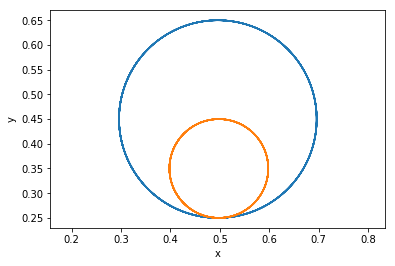

In [61]:
plt.plot(xplot[:, 0], yplot[:, 0])
plt.plot(xplot[:, 1], yplot[:, 1])


plt.xlim((0., L[0]))
plt.ylim((0., L[1]))

plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')

# 2. Test of particle accumulation (steps 1 and 3)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import bsplines          as bsp
import Bspline           as bspline

import hylife_PIC2

In [2]:
#====================================================================================
#  calling epyccel
#====================================================================================
from pyccel.epyccel import epyccel
pic = epyccel(hylife_PIC2)

print('pyccelization of pic functions done!')
#====================================================================================

pyccelization of pic functions done!


In [3]:
Nel = [3, 4, 5]            # mesh generation on logical domain
bc  = [True, True, True]   # boundary conditions
p   = [2, 2, 3]            # splines degrees

L   = [2., 3., 4.]         # box lengthes of physical domain

el_b     = [np.linspace(0., 1., Nel + 1) for Nel in Nel]                           # breakpoints
T        = [bsp.make_knots(el_b, p, bc) for el_b, p, bc in zip(el_b, p, bc)]       # knot vectors
t        = [T[1:-1] for T in T]                                                    # reduced knot vectors
Nbase0   = [Nel + p - bc*p for Nel, p, bc in zip(Nel, p, bc)]                      # number of basis functions in V0

Np = int(10)

particles = np.empty((Np, 7), dtype=float, order='F')

particles[:, :] = np.random.rand(Np, 7)


spans0       = np.empty((Np, 3), dtype=int, order='F')
spans0[:, 0] = np.floor(particles[:, 0]*Nel[0]).astype(int) + p[0]
spans0[:, 1] = np.floor(particles[:, 1]*Nel[1]).astype(int) + p[1]
spans0[:, 2] = np.floor(particles[:, 2]*Nel[2]).astype(int) + p[2]


b1 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b2 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')
b3 = np.zeros((Nel[0], Nel[1], Nel[2]), order='F')

b1[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b2[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5
b3[:, :, :] = np.random.rand(Nel[0], Nel[1], Nel[2]) - 0.5

DF     = np.array([[  L[0], 0., 0.], [0.,   L[1], 0.], [0., 0.,   L[2]]])
DFinv  = np.array([[1/L[0], 0., 0.], [0., 1/L[1], 0.], [0., 0., 1/L[2]]])

G      = np.array([[  L[0]**2, 0., 0.], [0.,   L[1]**2, 0.], [0., 0.,   L[2]**2]])
Ginv   = np.array([[1/L[0]**2, 0., 0.], [0., 1/L[1]**2, 0.], [0., 0., 1/L[2]**2]])

g_sqrt = L[0]*L[1]*L[2]

Beq    = g_sqrt*DFinv.dot(np.array([0., 0., 1.]))


# test spaces
spline_space0_1 = bspline.Bspline(T[0], p[0])
spline_space0_2 = bspline.Bspline(T[1], p[1])
spline_space0_3 = bspline.Bspline(T[2], p[2])

spline_space1_1 = bspline.Bspline(t[0], p[0] - 1)
spline_space1_2 = bspline.Bspline(t[1], p[1] - 1)
spline_space1_3 = bspline.Bspline(t[2], p[2] - 1)


d1 = 1/Nel[0]
d2 = 1/Nel[1]
d3 = 1/Nel[2]

In [4]:
B          = np.zeros(Np, dtype=float)

dt         = 0.15
vec_prod   = np.zeros((3, 3), dtype=float)


mat12_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat13_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)
mat23_test = np.zeros((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float)

for ip in range(Np):
    
    print(ip)
    
    B[0] = Beq[0]
    B[1] = Beq[1]
    B[2] = Beq[2]
    
    # evaluation of 1- component
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2] - 1):

                N1 = spline_space0_1(particles[ip, 0], i1)
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[0] += b1[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * N1 * D2 * D3
                
    # evaluation of 2- component
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2] - 1):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                N2 = spline_space0_2(particles[ip, 1], i2)
                D3 = spline_space1_3(particles[ip, 2], i3)/d3

                B[1] += b2[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * N2 * D3
                
    # evaluation of 3- component
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):

                D1 = spline_space1_1(particles[ip, 0], i1)/d1
                D2 = spline_space1_2(particles[ip, 1], i2)/d2
                N3 = spline_space0_3(particles[ip, 2], i3)

                B[2] += b3[i1%Nel[0], i2%Nel[1], i3%Nel[2]] * D1 * D2 * N3
                
                
    vec_prod[0, 1] = -B[2]
    vec_prod[0, 2] =  B[1]
    
    vec_prod[1, 0] =  B[2]
    vec_prod[1, 2] = -B[0]
    
    vec_prod[2, 0] = -B[1]
    vec_prod[2, 1] =  B[0]
    
    temp = Ginv.dot(vec_prod.dot(Ginv))
    
    
    # add contribution to 12 component (DNN NDN)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2]):
                for j1 in range(Nel[0] + p[0]):
                    for j2 in range(Nel[1] + p[1] - 1):
                        for j3 in range(Nel[2] + p[2]):
                            
                            D1i = spline_space1_1(particles[ip, 0], i1)/d1
                            N2i = spline_space0_2(particles[ip, 1], i2)
                            N3i = spline_space0_3(particles[ip, 2], i3)
                            
                            N1j = spline_space0_1(particles[ip, 0], j1)
                            D2j = spline_space1_2(particles[ip, 1], j2)/d2
                            N3j = spline_space0_3(particles[ip, 2], j3)

                            mat12_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 1] * D1i * N2i * N3i * N1j * D2j * N3j
    
    
    # add contribution to 13 component (DNN NND)
    for i1 in range(Nel[0] + p[0] - 1):
        for i2 in range(Nel[1] + p[1]):
            for i3 in range(Nel[2] + p[2]):
                for j1 in range(Nel[0] + p[0]):
                    for j2 in range(Nel[1] + p[1]):
                        for j3 in range(Nel[2] + p[2] - 1):
                            
                            D1i = spline_space1_1(particles[ip, 0], i1)/d1
                            N2i = spline_space0_2(particles[ip, 1], i2)
                            N3i = spline_space0_3(particles[ip, 2], i3)
                            
                            N1j = spline_space0_1(particles[ip, 0], j1)
                            N2j = spline_space0_2(particles[ip, 1], j2)
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat13_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[0, 2] * D1i * N2i * N3i * N1j * N2j * D3j
                            
                            
    # add contribution to 23 component (NDN NND)
    for i1 in range(Nel[0] + p[0]):
        for i2 in range(Nel[1] + p[1] - 1):
            for i3 in range(Nel[2] + p[2]):
                for j1 in range(Nel[0] + p[0]):
                    for j2 in range(Nel[1] + p[1]):
                        for j3 in range(Nel[2] + p[2] - 1):
                            
                            N1i = spline_space0_1(particles[ip, 0], i1)
                            D2i = spline_space1_2(particles[ip, 1], i2)/d2
                            N3i = spline_space0_3(particles[ip, 2], i3)
                            
                            N1j = spline_space0_1(particles[ip, 0], j1)
                            N2j = spline_space0_2(particles[ip, 1], j2)
                            D3j = spline_space1_3(particles[ip, 2], j3)/d3

                            mat23_test[i1%Nel[0], i2%Nel[1], i3%Nel[2], j1%Nel[0], j2%Nel[1], j3%Nel[2]] += particles[ip, 6] * temp[1, 2] * N1i * D2i * N3i * N1j * N2j * D3j

0
1
2
3
4
5
6
7
8
9


In [5]:
dt = 0.15

#mat12 = np.empty((Nbase0[0], Nbase0[1], Nbase0[0], Nbase0[1]), dtype=float, order='F')

#mat12 = np.empty((Nbase0[0], Nbase0[0]), dtype=float, order='F')
#mat12 = np.empty((Nbase0[1], Nbase0[1]), dtype=float, order='F')
#mat12 = np.empty((Nbase0[2], Nbase0[2]), dtype=float, order='F')

mat12 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat13 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')
mat23 = np.empty((Nbase0[0], Nbase0[1], Nbase0[2], Nbase0[0], Nbase0[1], Nbase0[2]), dtype=float, order='F')

pic.matrix_step1(particles, p, spans0, Nbase0, b1, b2, b3, T[0], T[1], T[2], t[0], t[1], t[2], L, dt, Beq, mat12, mat13, mat23)

In [8]:
np.allclose(mat23_test, mat23)

True